In [1]:
import matplotlib.pyplot as plt
import numpy as np
import koester

from astroquery.sdss import SDSS

import sys
sys.path.append("../../corv/src")
import corv

/Users/vedantchandra/0_research/01_sdss5/006_build_corv/data/comm_cat/
star and exposure catalogs not found! check paths and run make_catalogs() if you want to use sdss functionality. otherwise ignore.


In [2]:
#koester.compile.purge_tables("DA")
#koester.compile.purge_tables("DB")
#koester.compile.purge_tables("ELM")

In [9]:
def plot_fit(wavl, flux, ivar, corvmodel, params, gap = 0.3):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8, 6))
    model = corvmodel.eval(params, x = wavl)
    for ii, line in enumerate(corvmodel.names):
        cwl, cfl, civar = corv.utils.cont_norm_line(wavl, flux, ivar, 
                                        corvmodel.centres[line],
                                        corvmodel.windows[line],
                                        corvmodel.edges[line])
        cwavl, cmodel, _ = corv.utils.cont_norm_line(wavl, model, model, 
                                        corvmodel.centres[line],
                                        corvmodel.windows[line],
                                        corvmodel.edges[line])
        dlam = (cwl - corvmodel.centres[line])
        dlam_vel = 3e5 * (((1 + dlam / corvmodel.centres[line])**2 - 1) / ((1 + dlam / corvmodel.centres[line])**2 + 1)) - 28.80
        ax.plot(dlam_vel, cfl - ii * gap, c='k')
        ax.plot(dlam_vel, cmodel - ii * gap, c='r', alpha=0.7)
    ax.set_ylabel('Normalized Flux + Offset')
    ax.set_xlabel('Radial Velocity [km s$^{-1}$]')
    return fig, ax

plate = 4239
mjd = 55458
fiberid = 274

spec = SDSS.get_spectra_async(plate=plate, fiberID=fiberid, mjd=mjd)[0].get_fits()
wl = 10**spec[1].data['loglam']
fl = spec[1].data['flux']
ivar = spec[1].data['ivar']

In [13]:
test = koester.WDInterpolator(type = "DA", wavl_bounds=(1000, 28000))

corvmodel = corv.models.TwoParamModel(test.model_spec, test.wavl_grid, names = ['a', 'b', 'g', 'd'])
rv, e_rv, redchi, param_res = corv.fit.fit_corv(wl, fl, ivar, corvmodel.model)
rv, e_rv, redchi

(np.float64(44.08210549511805),
 np.float64(9.250765124599937),
 np.float64(0.7716807411398003))

(<Figure size 800x600 with 1 Axes>,
 <Axes: xlabel='Radial Velocity [km s$^{-1}$]', ylabel='Normalized Flux + Offset'>)

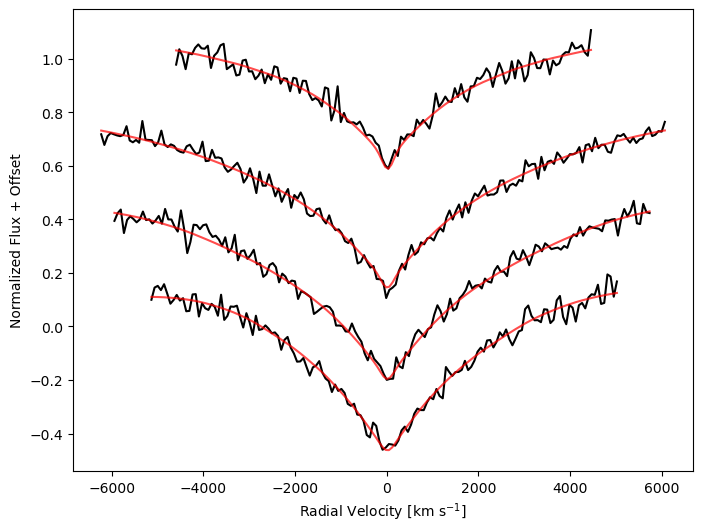

In [14]:
plot_fit(wl, fl, ivar, corvmodel.model, param_res.params)

In [ ]:
testdb = koester.WDInterpolator(type = "DB", wavl_bounds=(1000, 28000))